# Pima Indian Dibetes - EDA & Prediction
![](https://advancedveins.com/wp-content/uploads/2016/01/header-diabetes.jpg)
Dataset Link:https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



# Problem Statement

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## Evaluation Criteria and loss functions
Here is the formula for accuracy and error rate.

![](https://miro.medium.com/max/976/1*iBz8CA_yKFx9KWcAF31WTA.png)

Here,the two-lettered alphabets are of course coming from the confusion matrix.

![](https://miro.medium.com/max/870/1*xUdrn7cQEWwFAH8L8ZTr-w.png)

Here is an outline of the project:

1. Download the dataset

2. Explore & analyze the dataset

3. Missing Value/Outlier Treatment

4. Prepare the dataset for ML training

5. Train hardcoded & baseline models

6. Make predictions

7. Train & evaluate different models

8. Tune hyperparametrs for the best models

9. Saving the best model

10. Document & publish the project online



#1. Downloading the Dataset

Steps:

- Install required libraries

- Importing the necessary libraries

- Download data from Kaggle

- Load dataset with Pandas

Dataset link : 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1'

## Install Required Libraries

In [ ]:
!pip install plotly  opendatasets catboost --upgrade --quiet

### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import opendatasets as od
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Download Data from Kaggle

We will use the opendatsets library: https://jovian.ai/outlink?url=https%3A%2F%2Fgithub.com%2FJovianML%2Fopendatasets

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1'

In [ ]:
od.download(dataset_url)

In [ ]:
data_dir = './pima-indians-diabetes-database'

We are using the library os to view the files and directories.

In [ ]:
os.listdir(data_dir)

### Loading the dataset

In [ ]:
df = pd.read_csv(data_dir+'/diabetes.csv')

In [ ]:
df.sample(5)

In [ ]:
df.shape

In [ ]:
# Size of the file
!ls -lh {data_dir}

Observations:

- This is a supervised learning binary classification problem

- The dataset is 24k in size

- The dataset has 768 rows 

- The dataset has 9 columns:
    - Pregnancies
    -	Glucose
    -	BloodPressure
    -	SkinThickness
    -	Insulin
    -	BMI
    -	DiabetesPedigreeFunction
    -	Age
    -	Outcome

# 2. Explore the Dataset
  
  - Basic info about the dataset

  - Exploratory data analysis & Visualization

  - Ask & answer questions


In [ ]:
df.info()

In [ ]:
df.describe()

Observations about the dataset:

  - 768 rows,as expected

  - No missing data

  - Columns are mostly int and float data types.

  - The dataset takes up to 54.1 KB of space in the RAM

# Exploratory Data Analysis and Visulization

Let's explore the data by visualizing the distribution of values in some columns of the dataset

The following setting will imrove the deafault style and fontsize of our charts.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Pregnancies

Lets check the statistical data

In [ ]:
df.Pregnancies.describe()

In [ ]:
fig = px.histogram(df,
                   x='Pregnancies',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of Pregnacies')
fig.update_layout(bargap=0.1)
fig.show()

The distribution o pregnancies is not that uniform. Also column contains some outliers.

# Glucose

Let's check the statistcal data of the column and plot the distribution of Glucose using a histogram and boxplot.


In [ ]:
df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='Glucose',
                   marginal='box',
                   color='Outcome',
                   #color_discrete_sequence=['red'],
                   title='Distribution of Glucose')
fig.update_layout(bargap=0.1)
fig.show()

Distribution is kind of a gausian distribution but contains some zero values as inputs,which are the outliers.

# BloodPressure 

Let's visualize the distribution of blood pressure also check the statistcal data of the column and plot the distribution of Glucose using a histogram and boxplot.


In [ ]:
fig = px.histogram(df,
                   x='BloodPressure',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of BloodPressure')
fig.update_layout(bargap=0.1)
fig.show()

The BloodPressure column also kind of Gausian distribution. It contains zero values as outliers and some other outlier values also.

# SkinThickness

Let's visualize the distribution of SkinThickness also check the statistcal data of the column and plot the distribution of SkinThickness using a histogram and boxplot.

In [ ]:
df.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='SkinThickness',
                   marginal='box',
                   color='Outcome',
                   title = 'Distribution of SkinThickness')
fig.update_layout(bargap=0.1)
fig.show()

Here also the zero values are some problems and some right skewness also we can see.

# Insulin

Let's visualize the distribution of Insulin also check the statistcal data of the column and plot the distribution of Insulin using a histogram and boxplot.

In [ ]:
df.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='Insulin',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of Insulin')
fig.update_layout(bargap=0.1)
fig.show()

Insulin column is highly right skewed and contains many outliers.It also has zero values,so we've to treat that.

# BMI

Let's visualize the distribution of BMI also check the statistcal data of the column and plot the distribution of BMI using a histogram and boxplot.

In [ ]:
df.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='BMI',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of BMI is a some what kind of gausian distribution,It also shows outliers.

# DiabetesPedigreeFunction

Let's visualize the distribution DiabetesPedigreeFunction of  also check the statistcal data of the column and plot the distribution of DiabetesPedigreeFunction using a histogram and boxplot.

In [ ]:
df.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='DiabetesPedigreeFunction',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of DiabetesPedigreeFunction')
fig.update_layout(bargap=0.1)
fig.show()

# Age

Let's visualize the distribution Age of also check the statistcal data of the column and plot the distribution of Age using a histogram and boxplot.

In [ ]:
df.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [ ]:
fig = px.histogram(df,
                   x='Age',
                   color='Outcome',
                   marginal='box',
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# Outcome

It is our target column
Let's check the value count

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
fig = px.histogram(df,
                   x='Outcome',
                   color_discrete_sequence=['green'],
                   title='Distribution of Outcome')
fig.update_layout(bargap=0.1)
fig.show()

It shows that we have a imbalance dataset.

### Correlation on Dataset based on Target Variable

In [ ]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

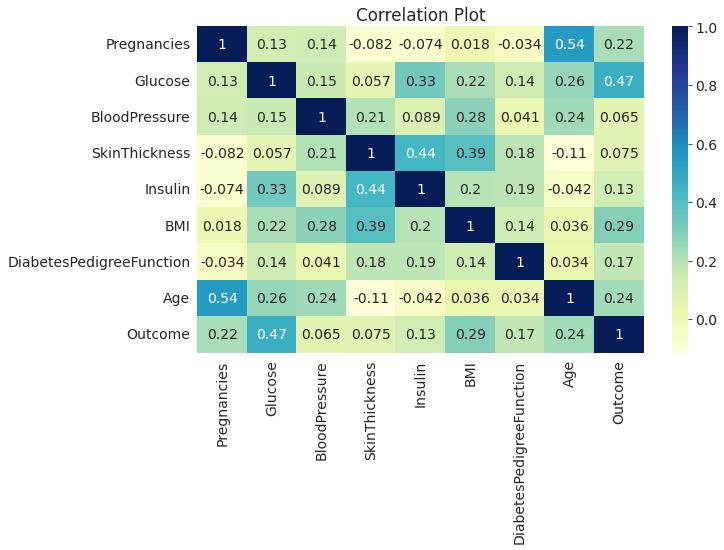

In [ ]:
# Correlation using Heat Map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title('Correlation Plot')
plt.show()

# 3. Missing Value/Outliers Treatment

### Handling the columns contains zero

some columns contains value 0 ,it doest make sense

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI
- Pregnancies

We are imputing and NaN value in place f columns that contains zero,then impute the NaN with mean or median based on the distribution of that columns.

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Filling missing values based on their distribution 

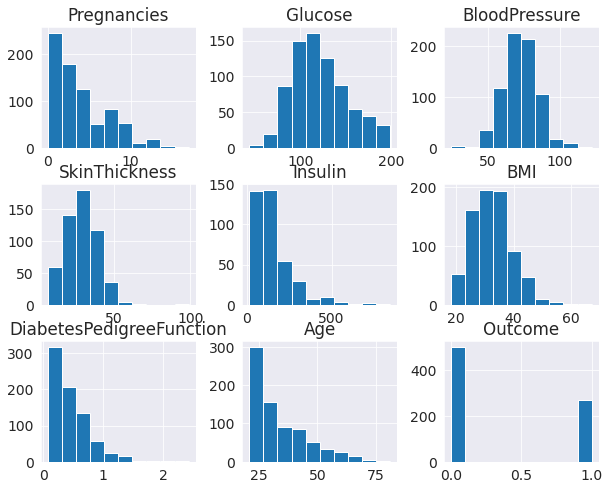

In [ ]:
p = df.hist(figsize=(10,8))

In [ ]:
df.Glucose.fillna(df.Glucose.mean(),inplace=True)
df.BloodPressure.fillna(df.BloodPressure.mean(),inplace=True)
df.SkinThickness.fillna(df.SkinThickness.median(),inplace=True)
df.Insulin.fillna(df.Insulin.median(),inplace=True)
df.BMI.fillna(df.BMI.median(),inplace=True)

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling Outlier values of all columns


Here we are capping the outlier values to upper fence and lower fence using the plotly interactive charts.

### Pregnancies

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Pregnancies'].iteritems():
  
  if value>11:
    lst.append(idx)
print(lst)

[28, 86, 274, 333, 358, 436, 518, 582, 744, 745]


In [ ]:
for i in lst:
  df.loc[i,'Pregnancies']=11

### Glucose

In [ ]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==0,'Glucose'].iteritems():
  if value>173:
    lst_upper.append(idx)
  elif value<56:
    lst_lower.append(idx)

print(lst_upper) 
print(lst_lower)

[40, 212, 228, 258, 260, 327, 489, 549, 622, 728]
[62]


In [ ]:
for i in lst_upper:
  df.loc[i,'Glucose']=173
for j in lst_lower:
  df.loc[i,'Glucose']=56

### BloodPressure

In [ ]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==0,'BloodPressure'].iteritems():
  if value>100:
    lst_upper.append(idx)
  elif value<38:
    lst_lower.append(idx)
print(lst_upper)
print(lst_lower)

[106, 362, 549, 658, 672]
[18, 597]


In [ ]:
for i in lst_upper:
  df.loc[i,'BloodPressure']=100
for i in lst_lower:
  df.loc[i,'BloodPressure']=38  

In [ ]:
lst_upper=[]
lst_lower=[]
for idx,value in df.loc[df.Outcome==1,'BloodPressure'].iteritems():
  if value>106:
    lst_upper.append(idx)
  elif value<48:
    lst_lower.append(idx)
print(lst_upper)
print(lst_lower) 

[43, 84, 177, 691]
[4, 125]


In [ ]:
for i in lst_upper:
  df.loc[i,'BloodPressure']=106
for i in lst_lower:
  df.loc[i,'BloodPressure']=48 


### SkinThickness

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'SkinThickness'].iteritems():
  
  if value>63:
    print(idx,value)
    lst.append(idx)
print(lst)   

579 99.0
[579]


In [ ]:
for i in lst:
  df.loc[i,'SkinThickness']=63

### Insulin

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Insulin'].iteritems():
  
  if value>255:
    lst.append(idx)
print(lst) 

[54, 73, 139, 144, 153, 162, 228, 247, 248, 258, 279, 286, 364, 392, 395, 412, 486, 487, 519, 574, 608, 645, 679, 707, 710, 713]


In [ ]:
for i in lst:
  df.loc[i,'Insulin']=255

### BMI

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'BMI'].iteritems():
  
  if value>47.9:
    lst.append(idx)
print(lst)

[247, 673]


In [ ]:
for i in lst:
  df.loc[i,'Insulin']=47.9

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'BMI'].iteritems():
  
  if value>50:
    lst.append(idx)
print(lst)

[120, 125, 177, 193, 303, 445]


In [ ]:
for i in lst:
  df.loc[i,'Insulin']=50

### DiabetesPedigreeFunction

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'DiabetesPedigreeFunction'].iteritems():
  
  if value>1.022:
    lst.append(idx)
print(lst)

[12, 58, 147, 228, 267, 330, 371, 383, 395, 412, 416, 434, 487, 534, 593, 621, 622, 657, 744, 747]


In [ ]:
for i in lst:
  df.loc[i,'DiabetesPedigreeFunction']=1.022

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'DiabetesPedigreeFunction'].iteritems():
  
  if value>1.394:
    lst.append(idx)
print(lst)

[4, 45, 370, 445]


In [ ]:
for i in lst:
  df.loc[i,'DiabetesPedigreeFunction']=1.394

### Age

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==0,'Age'].iteritems():
  
  if value>58:
    lst.append(idx)
print(lst)

[30, 123, 148, 212, 223, 263, 294, 361, 362, 453, 456, 459, 475, 479, 489, 495, 509, 519, 537, 552, 582, 674, 684, 763]


In [ ]:
for i in lst:
  df.loc[i,'Age']=58

In [ ]:
lst=[]
for idx,value in df.loc[df.Outcome==1,'Age'].iteritems():
  
  if value>67:
    lst.append(idx)
print(lst)

[666]


In [ ]:
for i in lst:
  df.loc[i,'Age']=67

# 4. Prepare the Dataset for ML Training

## Input and target cols

In [ ]:
input_cols = df.columns[:-1].tolist()

In [ ]:
target_col = 'Outcome'

In [ ]:
input_df = df[input_cols]

In [ ]:
input_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,48.0,35.0,168.0,43.1,1.394,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,58
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [ ]:
target = df[target_col]

In [ ]:
target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Train test split

In [ ]:
X,X_test,y,y_test= train_test_split(input_df,target,test_size=0.1,random_state=1)

In [ ]:
print('X.shape',X.shape)
print('X_test.shape',X_test.shape)
print('y.shape',y.shape)
print('y_test.shape',y_test.shape)

X.shape (691, 8)
X_test.shape (77, 8)
y.shape (691,)
y_test.shape (77,)


In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
69,4,146.0,85.0,27.0,100.0,28.9,0.189,27
382,1,109.0,60.0,8.0,182.0,25.4,0.947,21
195,5,158.0,84.0,41.0,210.0,39.4,0.395,29
84,5,137.0,106.0,29.0,125.0,48.8,0.227,37
442,4,117.0,64.0,27.0,120.0,33.2,0.230,24
...,...,...,...,...,...,...,...,...
645,2,157.0,74.0,35.0,255.0,39.4,0.134,30
715,7,187.0,50.0,33.0,392.0,33.9,0.826,34
72,13,126.0,90.0,29.0,125.0,43.4,0.583,42
235,4,171.0,72.0,29.0,125.0,43.6,0.479,26


## Scaling Down

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [ ]:
X = pd.DataFrame(X,columns = input_cols)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.057337,0.815950,1.065042,-0.227047,-0.490232,-0.510451,-0.939680,-0.539492
1,-0.856960,-0.417995,-1.044927,-2.485308,0.640461,-1.022809,1.760012,-1.073318
2,0.362102,1.216149,0.980643,1.436934,1.026552,1.026623,-0.205990,-0.361550
3,0.362102,0.515801,2.837415,0.010664,-0.145508,2.402670,-0.804339,0.350219
4,0.057337,-0.151196,-0.707332,-0.227047,-0.214453,0.119017,-0.793654,-0.806405
...,...,...,...,...,...,...,...,...
686,-0.552195,1.182799,0.136656,0.723799,1.647054,1.026623,-1.135568,-0.272579
687,0.971633,2.183295,-1.888914,0.486088,3.536139,0.221489,1.329059,0.083306
688,2.800227,0.148952,1.487035,0.010664,-0.145508,1.612175,0.463590,0.795074
689,0.057337,1.649697,-0.032142,0.010664,-0.145508,1.641452,0.093184,-0.628463


In [ ]:
X_test = pd.DataFrame(X_test,columns=input_cols)
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.971633,0.482451,0.136656,-0.345903,-0.007619,-0.934977,0.691533,1.595814
1,-0.856960,0.982699,-1.044927,0.010664,-0.145508,-0.920338,-0.975296,-0.984347
2,0.666868,-0.417995,-1.044927,-0.227047,-0.145508,-1.081365,-0.879133,-0.539492
3,-0.247429,-2.018790,0.811845,-0.108191,-0.145508,0.294683,-0.747353,1.150959
4,-0.856960,-0.184546,0.474251,0.010664,0.612884,0.543542,0.153731,-0.717434
...,...,...,...,...,...,...,...,...
72,0.057337,-0.117847,-0.200939,0.010664,-0.145508,1.773202,1.606864,-0.628463
73,-0.552195,-2.185539,-1.382521,-0.108191,-1.248624,-1.198475,-0.430371,-0.984347
74,1.276399,1.082749,0.474251,0.367232,-0.145508,0.001907,-0.035034,1.061988
75,1.581164,-0.084497,0.643048,0.723799,-0.145508,-0.495813,-0.676121,-0.361550


# 5. Train & Evaluate Hardcoded & Baseline Models

Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat.

## Hard coded models

We are creating two hard coded models which randomly produce outputs and other one always produce zero. Ideally our other models should beat these dump models otherwise our models will also be useless.

In [ ]:
def random_guess(inputs):
  return np.random.choice([0,1],len(inputs))

In [ ]:
def all_zero(inputs):
  return np.full(len(inputs),0)

Lets check the accuracy of test set on this dump models.

In [ ]:
accuracy_score(y_test,random_guess(X_test))

0.5584415584415584

In [ ]:
accuracy_score(y_test,all_zero(X_test))

0.6233766233766234

Ideally models we create should break the accuracy of above dump and random model.

## Baseline Model

We are creating a Logistic Regression baseline model.Our all other trained model should beat this hard coded and baseline models.

In [ ]:
base_model = LogisticRegression()
base_model.fit(X,y)
train_score = base_model.score(X,y)
test_score = base_model.score(X_test,y_test)
print(train_score,test_score)

0.7771345875542692 0.7792207792207793


# 6. Train & Evaluate Different Models

Here we train and evaluate different models with some random manual hyperparameter tuning.

## Logistic Model

In [ ]:
lr_model = LogisticRegression(n_jobs=-1,
                              random_state=42,
                              )
lr_model.fit(X,y)

LogisticRegression(n_jobs=-1, random_state=42)

Lets define a helper function which gives us a confusion matrix heat map

In [ ]:
def predict_and_plot(model,inputs,targets,name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets,preds)
  print("Accuracy : {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True,cmap='Blues')
  plt.xlabel('Prediction')
  plt.ylabel('Actual')
  plt.title('{} Confusion Matrix'.format(name))

  return preds


Accuracy : 77.71%


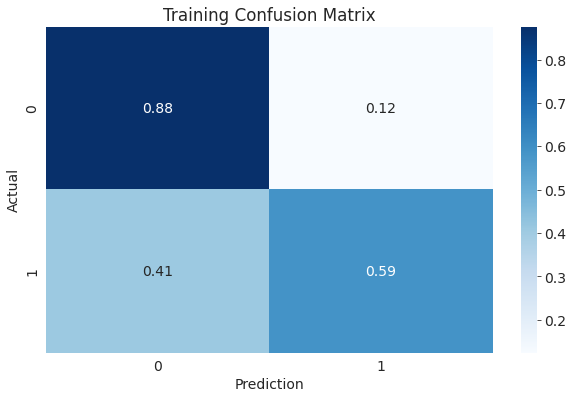

In [ ]:
train_preds = predict_and_plot(lr_model,X,y,'Training')

Accuracy : 77.92%


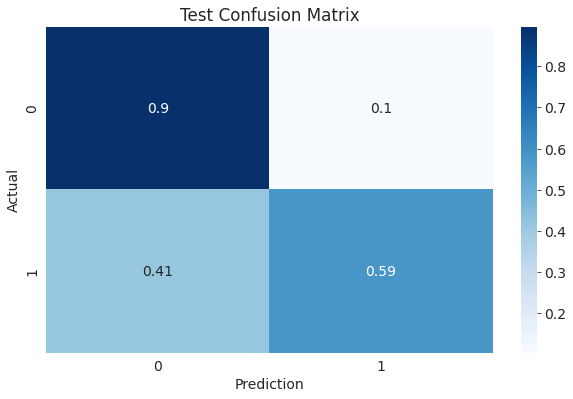

In [ ]:
test_preds = predict_and_plot(lr_model,X_test,y_test,'Test')

In [ ]:
#clasification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.77      0.59      0.67        29

    accuracy                           0.78        77
   macro avg       0.78      0.74      0.75        77
weighted avg       0.78      0.78      0.77        77



## Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42,
                                  max_depth=2)

In [ ]:
dt_model.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
dt_model.score(X,y)

0.7351664254703328

In [ ]:
dt_model.score(X_test,y_test)

0.7532467532467533

Accuracy : 73.52%


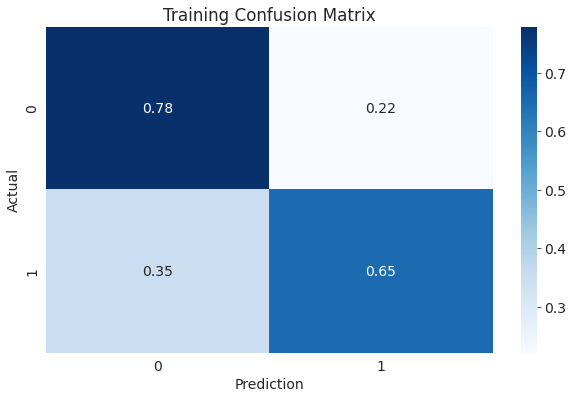

In [ ]:
train_preds = predict_and_plot(dt_model,X,y,'Training')

Accuracy : 75.32%


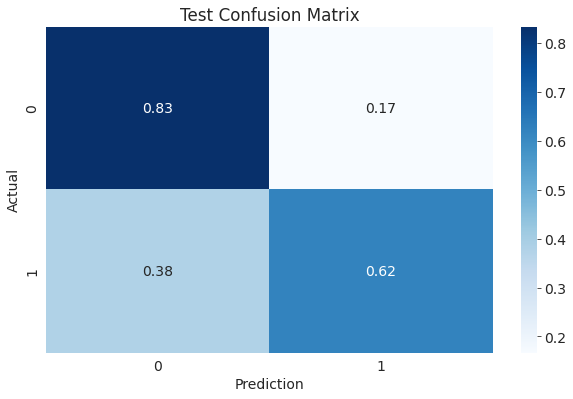

In [ ]:
test_preds = predict_and_plot(dt_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.69      0.62      0.65        29

    accuracy                           0.75        77
   macro avg       0.74      0.73      0.73        77
weighted avg       0.75      0.75      0.75        77



## RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42,
                                  n_jobs=-1,
                                  n_estimators=5,
                                  max_depth=4)

In [ ]:
rf_model.fit(X,y)

RandomForestClassifier(max_depth=4, n_estimators=5, n_jobs=-1, random_state=42)

In [ ]:
train_preds = predict_and_plot(rf_model,X,y,'Training')


In [ ]:
test_preds = predict_and_plot(rf_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(y_test,test_preds))

## XGBClassifier

In [ ]:
xg_model = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)

In [ ]:
xg_model.fit(X,y)

In [ ]:

xg_model.score(X,y)

In [ ]:
xg_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(xg_model,X,y,'Training')


In [ ]:
test_preds = predict_and_plot(xg_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(y_test,test_preds))

## LGBM Classifier

In [ ]:
lgbm_model = lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)

In [ ]:
lgbm_model.fit(X,y)

In [ ]:

lgbm_model.score(X,y)

In [ ]:
lgbm_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(lgbm_model,X,y,'Training')

In [ ]:
test_preds = predict_and_plot(lgbm_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## Catboost 

In [ ]:
cat_model = CatBoostClassifier(iterations=62)

In [ ]:
cat_model.fit(X,y)

In [ ]:
cat_model.score(X,y)

In [ ]:
cat_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(cat_model,X,y,'Training')

In [ ]:
test_preds = predict_and_plot(cat_model,X_test,y_test)

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## SVC

In [ ]:
svc_model = SVC(C=5,random_state=42,probability=True)

In [ ]:
svc_model.fit(X,y)

In [ ]:
svc_model.score(X,y)

In [ ]:
svc_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(svc_model,X,y,'Training')

In [ ]:
test_preds = predict_and_plot(svc_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_model.fit(X,y)

In [ ]:

knn_model.score(X,y)

In [ ]:
knn_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(knn_model,X,y,'Training')

In [ ]:
test_preds = predict_and_plot(knn_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## Adaboost

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

In [ ]:
ada_model.fit(X,y)

In [ ]:
ada_model.score(X,y)

In [ ]:
ada_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(ada_model,X,y,'Training')



In [ ]:
test_preds = predict_and_plot(ada_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## Stacking Classifier

In [ ]:
#get a stacking esemble of models

#define the base models 
level0 = list()

level0.append(('xg',XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)))

level0.append(('cat',CatBoostClassifier(iterations=62)))

level0.append(('lgbm',lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)))

level0.append(('ada',AdaBoostClassifier()))

level0.append(('knn',KNeighborsClassifier(n_jobs=-1)))



#define meta learner model
level1 = LogisticRegression()
#define stacking ensemble
stacking_model = StackingClassifier(estimators=level0,final_estimator=level1)

stacking_model.fit(X,y)


In [ ]:
stacking_model.score(X,y)

In [ ]:
stacking_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(stacking_model,X,y,'Training')

In [ ]:
test_preds  = predict_and_plot(stacking_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

## Voting Classifier

In [ ]:
xg_clf = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)

ada_clf = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

knn_clf = KNeighborsClassifier()

lgbm_clf = lgbm.LGBMClassifier(random_state=42,
                                 num_leaves=2,
                                 num_iterations=84)

cat_clf = CatBoostClassifier(iterations=50)


voting_model = VotingClassifier(estimators=[('xg',xg_clf),
                                            ('ada',ada_clf),
                                            ('knn',knn_clf),
                                            ('lgbm',lgbm_clf),
                                            ('cat',cat_clf)],voting='soft')
voting_model.fit(X,y)


In [ ]:
voting_model.score(X,y)

In [ ]:
voting_model.score(X_test,y_test)

In [ ]:
train_preds = predict_and_plot(voting_model,X,y,'Training')

In [ ]:
test_preds = predict_and_plot(voting_model,X_test,y_test,'Test')

In [ ]:
#classification report of test
print(classification_report(test_preds,y_test))

Out of all models we have found that XGBoost model gives us a Training accuracy of 87.26 and Test accuracy of 85.26  which is highest among other model .

# 7. Hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['deviance', 'exponential'],'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]

grid_params_svc=[{'kernel':['linear','poly','rbf'],'degree':[3,4,5]}]




clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad,grid_params_svc]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X,y)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X,y)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X,y)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

# Saving the best Trained Model

We are taking the Adaboost model as our best model.

In [ ]:
xg_model = XGBClassifier(random_state=42,
                         n_jobs=-1,
                         n_estimators=85)
xg_model.fit(X,y)

In [ ]:
import joblib
joblib.dump(xg_model,'model.pkl')

In [ ]:
#joblib.dump()

In [ ]:
joblib.dump(scaler,'scaler.pkl')

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=45,
                               random_state=42)

# Conclusions

Considering this work, the key messages and conclusion of this work could be summarised as follows:

1. The project result shows Adaboost,Voting Classifier and XGboost shows the higher accuracy on the training and test datasets.

2. Adaboost was recorded 85.38% on training set and 84.42% on test set,while Voting classifier recorded 85.24% on training and 84.42% on test and xgboost recorded 87.5% and 84.4% on test dataset.

3. We have manually tuned some hyper parameters and alse used gridsearchCv also.

4. We have also calucalated the Precision,recall anf F1 score ..which let us to choose the model.



# References

- Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/download?datasetVersionNumber=1

- Machine Learning with Python:Zero to GBMs

- Opendatasets library
